In [ ]:
pip install pandas numpy nltk matplotlib seaborn wordcloud

In [2]:
import pandas as pd

In [12]:
file_path = pd.read_csv(r'C:\Users\NANDINI\Downloads\ds_5b\twitter_validation.csv')

In [13]:

print(file_path.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [14]:
print(file_path.isnull().sum())

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [15]:
file_path.dropna(inplace=True)

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
file_path.columns = ['id', 'entity', 'category', 'content']

In [19]:
print(file_path.head())

     id     entity  category  \
0   352     Amazon   Neutral   
1  8312  Microsoft  Negative   
2  4371      CS-GO  Negative   
3  4433     Google   Neutral   
4  6273       FIFA  Negative   

                                             content  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...  
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NANDINI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


positive    478
negative    391
neutral     130
Name: sentiment, dtype: int64


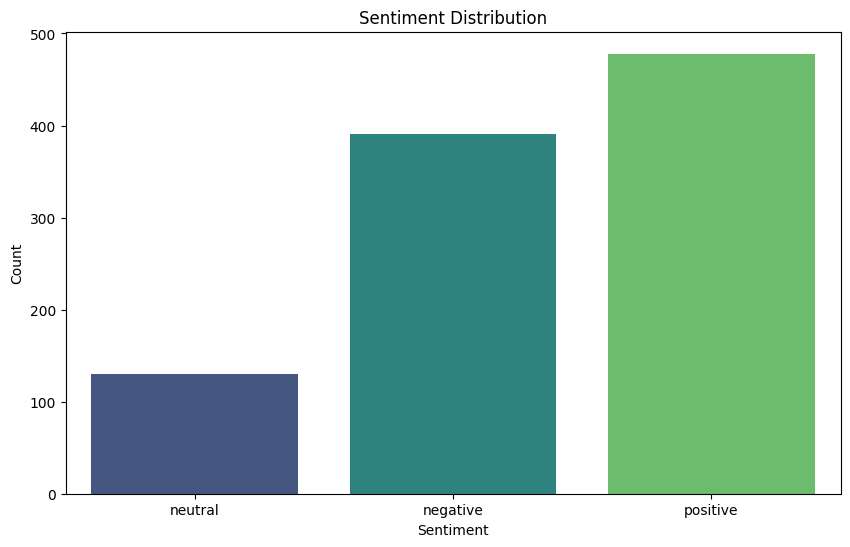

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to classify sentiments
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the correct column
file_path['sentiment'] = file_path['content'].apply(get_sentiment)

# Display the sentiment distribution
print(file_path['sentiment'].value_counts())

# Sentiment distribution bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=file_path, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

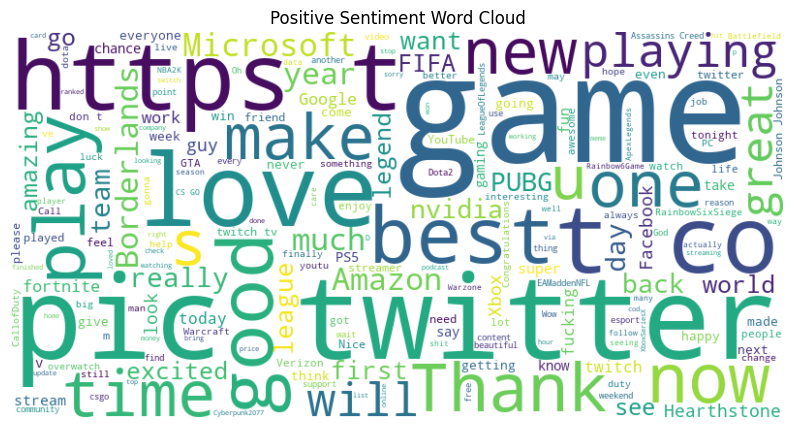

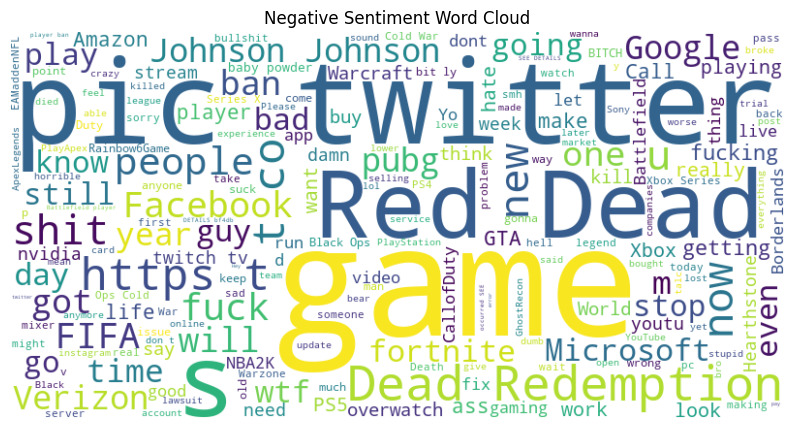

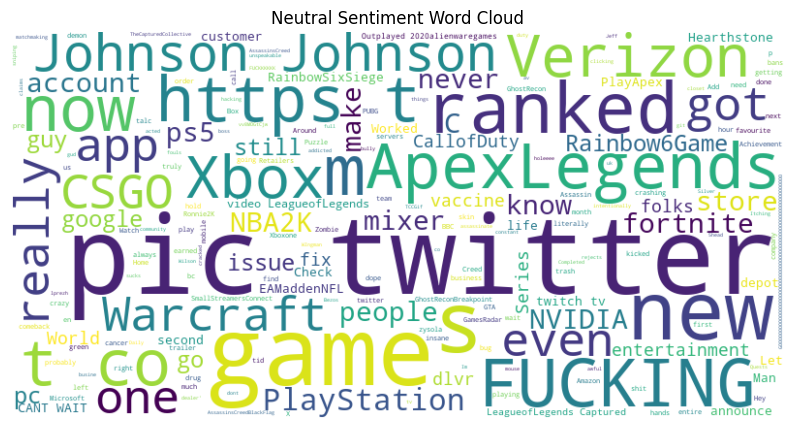

In [22]:
# Word Cloud for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(file_path[file_path['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()